In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [19]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [20]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [22]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


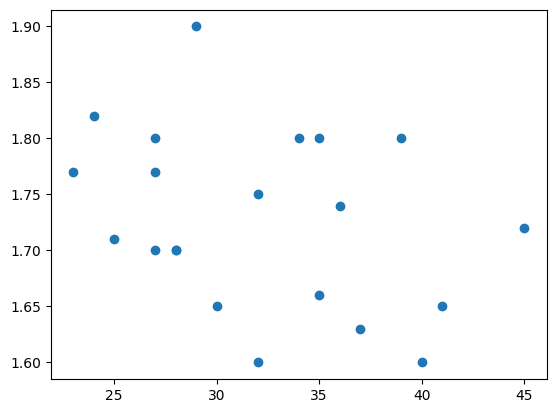

In [23]:
plt.scatter(df['Edad'], df['Altura'])

<Axes: xlabel='Edad', ylabel='Altura'>

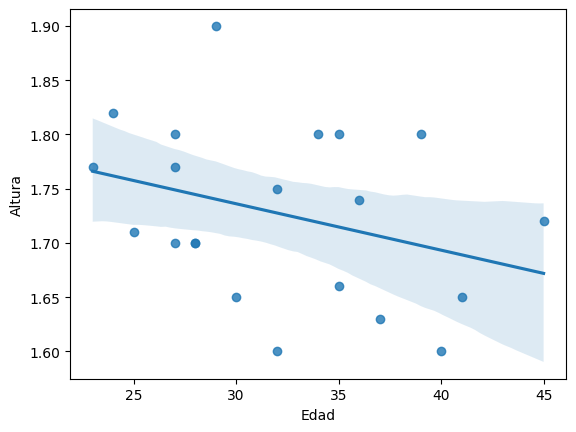

In [24]:
sns.regplot(x=df['Edad'], y=df['Altura'])

<Axes: >

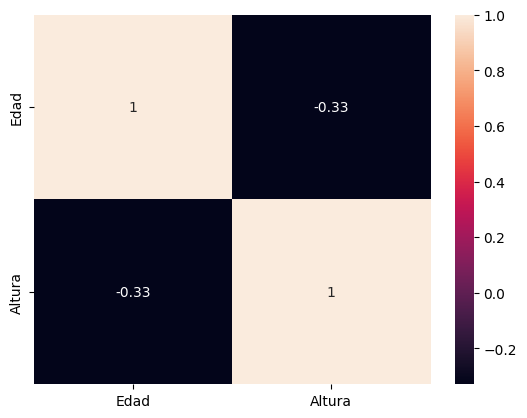

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

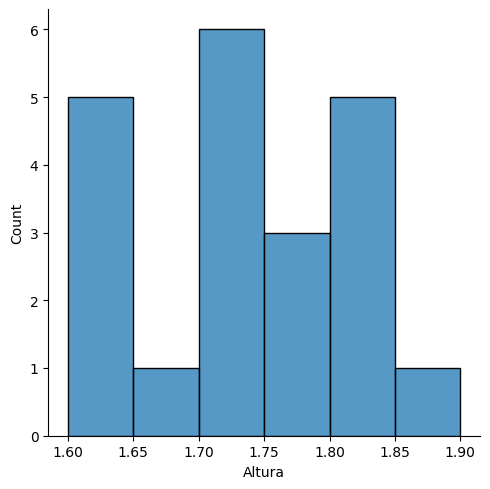

In [26]:
sns.displot(df['Altura'])

### Entrena un modelo de regresión lineal

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
# train_test_split?

In [31]:
X = df[['Edad']]
y = df['Altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


y = a + b*x

altura = a + b*Edad

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
lr.intercept_

1.858051298091961

In [35]:
lr.coef_

array([-0.00435721])

altura = 1.86 - 0.004 * Edad

In [40]:
edad = 31
altura = 1.858051 - 0.004357 * edad
print(altura)

1.7229839999999998


In [39]:
lr.predict([[31], [40], [22]])

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.72297779, 1.6837629 , 1.76219268])

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [41]:
y_pred = lr.predict(X_test)
y_pred

array([1.75347826, 1.70990616, 1.71862058, 1.74912105, 1.70119174])

In [42]:
y_test

0     1.82
17    1.80
15    1.75
1     1.71
8     1.74
Name: Altura, dtype: float64

In [48]:
df_eval = pd.DataFrame(X_test.copy())
df_eval['prediccion'] = y_pred
df_eval['valor_real'] = y_test
df_eval['error'] = abs(df_eval['prediccion'] - df_eval['valor_real'])
df_eval['error_cuad'] = df_eval['error'] ** 2
df_eval

,Edad,prediccion,valor_real,error,error_cuad
0,24,1.753478,1.82,0.066522,0.004425
17,34,1.709906,1.80,0.090094,0.008117
15,32,1.718621,1.75,0.031379,0.000985
1,25,1.749121,1.71,0.039121,0.001530
8,36,1.701192,1.74,0.038808,0.001506


In [49]:
df_eval['error'].mean() #MAE

0.05318486080700664

In [51]:
df_eval['error_cuad'].mean() #MSE

0.0033126493607306537

In [52]:
df_eval['error_cuad'].mean() ** (1/2) #RMSE

0.057555619714591326

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
print("R2_score", r2_score(y_test, y_pred))

MAE 0.05318486080700664
MAPE 0.029943007687355166
MSE 0.0033126493607306537
RMSE 0.057555619714591326
R2_score -1.0398087196617292


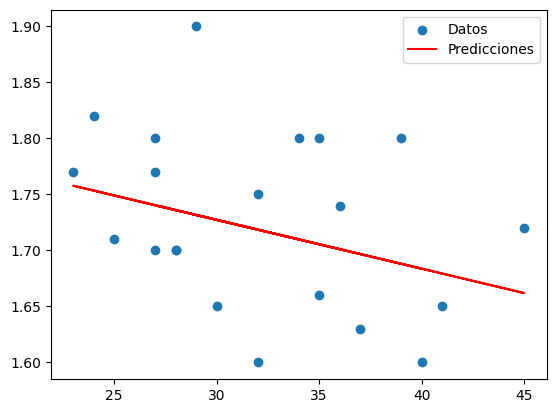

In [58]:
plt.scatter(df['Edad'], df['Altura'], label = "Datos")
plt.plot(df['Edad'], lr.predict(X), color="r", label="Predicciones")
plt.legend()

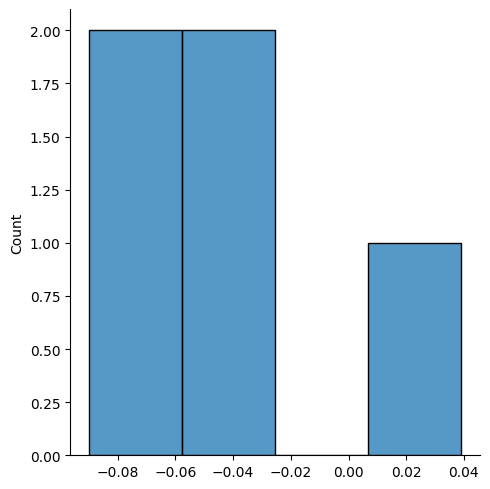

In [59]:
sns.displot(df_eval['prediccion'] - df_eval['valor_real'])